#                                            BUSINESS REPORT
                                                                                                               BY ASHWATH J

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df1=pd.read_excel("C:\\Users\\Intel\\Downloads\\Data Analyst.xlsx",sheet_name='orders_dataset')
df2=pd.read_excel("C:\\Users\\Intel\\Downloads\\Data Analyst.xlsx",sheet_name='order_items_dataset')
df3=pd.read_excel("C:\\Users\\Intel\\Downloads\\Data Analyst.xlsx",sheet_name='products_dataset')
df4=pd.read_excel("C:\\Users\\Intel\\Downloads\\Data Analyst.xlsx",sheet_name='customers_dataset')

In [46]:
df1.shape

(99441, 8)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [48]:
df1['Delivery Time']=(df1['order_delivered_customer_date']-df1['order_purchase_timestamp']).dt.total_seconds()/86400
df1['Delivery Time']

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Name: Delivery Time, Length: 99441, dtype: float64

AVERAGE DELIVERY TIME OF DELEVERED ORDERS

In [49]:
new_df1 = df1[df1['order_status']=='delivered']

In [50]:
new_df1['Delivery Time'].mean()

12.558217098051975

SLA IS THE EXPECTED TIME OF DELIVERY PROMISED TO THE CUSTOMER

Number of deliveries made after order_estimated_delivery_date

In [51]:
df1['SLA']=(df1['order_estimated_delivery_date']-df1['order_purchase_timestamp']).dt.total_seconds()/86400
df1['SLA'].mean()

23.767649925118448

OUR MAJOR CONCERN IS THE LATE  DELIVERIES 

In [58]:
def methods(x):
    if (x['SLA']>x['Delivery Time']):
        return 1
    else:
        return 0
df1['delay_flag']=df1.apply(methods,axis=1)
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,delay_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,1
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442,1
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,1
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,1


In [63]:
df1[(df1['delay_flag']==0) & (df1['order_status']=='delivered')]['order_id'].count()

7834

In [274]:
df1['order_id'].count()

99441

In [64]:
(df1[(df1['delay_flag']==0) & (df1['order_status']=='delivered')]['order_id'].count()/df1['order_id'].count())*100

7.878038233726531

7.87 % of the orders are not delivered on time.

In [65]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,delay_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,1
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442,1
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,1
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,1


MERGING DATASETS

In [76]:
merge1=pd.merge(df1,df2,how='inner',on='order_id')
merge1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,delay_flag,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,1,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,1,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,1,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,1,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,1,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,1,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,1,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,1,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,1,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [77]:
merge2=pd.merge(merge1,df3,how='left',on='product_id')
merge2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [78]:
merge3=pd.merge(merge2,df4,on='customer_id',how='left')
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,828.0,4.0,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,500.0,2.0,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ


In [88]:
merge3['customer_city'].unique()

array(['sao paulo', 'barreiras', 'vianopolis', ..., 'messias targino',
       'campo do tenente', 'nova vicosa'], dtype=object)

CITY LEVEL - ORDERS 

In [90]:
df_city_lvl=pd.DataFrame(merge3.groupby(by='customer_city')['order_id'].count())
df_city_lvl

,order_id
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,14
abaiara,2
...,...
xinguara,10
xique-xique,3
zacarias,2


THE CITY WITH MAX ORDERS IS SAO PAULO

In [97]:
df_city_lvl[df_city_lvl['order_id']==df_city_lvl['order_id'].max()]

,order_id
customer_city,
sao paulo,17808


BELOW ARE THE CITIES WITH MIN ORDERS 

In [102]:
df_city_lvl[df_city_lvl['order_id']==df_city_lvl['order_id'].min()]

,order_id
customer_city,
abadiania,1
acajutiba,1
acari,1
acucena,1
adhemar de barros,1
...,...
vitorino,1
vitorinos,1
wagner,1


ZIP CODE - ORDER LEVEL

In [104]:
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,828.0,4.0,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,500.0,2.0,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ


In [105]:
df_zip_lvl=pd.DataFrame(merge3.groupby(by='customer_zip_code_prefix')['order_id'].count())
df_zip_lvl

,order_id
customer_zip_code_prefix,
1003.0,1
1004.0,2
1005.0,6
1006.0,2
1007.0,4
...,...
99960.0,1
99965.0,2
99970.0,1


In [106]:
df_zip_lvl[df_zip_lvl['order_id']==df_zip_lvl['order_id'].max()]

,order_id
customer_zip_code_prefix,
22790.0,154


THE ZIP CODE 22790 HAS THE HIGHEST ORDERS

In [107]:
df_zip_lvl[df_zip_lvl['order_id']==df_zip_lvl['order_id'].min()]

,order_id
customer_zip_code_prefix,
1003.0,1
1019.0,1
1022.0,1
1023.0,1
1025.0,1
...,...
99920.0,1
99925.0,1
99960.0,1


THE ABOVE PINCODES HAS THE LEAST ORDERS

STATE - ORDER LEVEL

In [335]:
df_state_lvl=pd.DataFrame(merge3.groupby(by='customer_state')['order_id'].count())
df_state_lvl

,order_id
customer_state,
AC,92
AL,444
AM,165
AP,82
BA,3799
CE,1478
DF,2406
ES,2256
GO,2333


SP HAS THE HIGHEST ORDERS

In [222]:
df_state_lvl[df_state_lvl['order_id']==df_state_lvl['order_id'].max()]

,order_id
customer_state,
SP,47449


In [223]:
df_state_lvl[df_state_lvl['order_id']==df_state_lvl['order_id'].min()]

,order_id
customer_state,
RR,52


Y-O-Y SALE

In [123]:
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,828.0,4.0,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,500.0,2.0,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ


In [124]:
merge3['year'] = pd.DatetimeIndex(merge3['order_delivered_customer_date']).year


In [125]:
merge3.groupby(by='year')['order_id'].count()

year
2016.0      323
2017.0    46803
2018.0    63070
Name: order_id, dtype: int64

In [140]:
merge3['month'] = pd.DatetimeIndex(merge3['order_delivered_customer_date']).month


In [306]:
pivot=pd.pivot_table(merge3,index=['month'],columns=['year'],values='order_id',aggfunc='count')
pivot

year,2016.0,2017.0,2018.0
month,,,
1.0,NaN,326.0,7419.0
2.0,NaN,1565.0,6623.0
3.0,NaN,2724.0,7948.0
4.0,NaN,2072.0,8999.0
5.0,NaN,4201.0,8166.0
6.0,NaN,3640.0,7887.0
7.0,NaN,3933.0,6581.0
8.0,NaN,4900.0,9385.0
9.0,NaN,4496.0,59.0


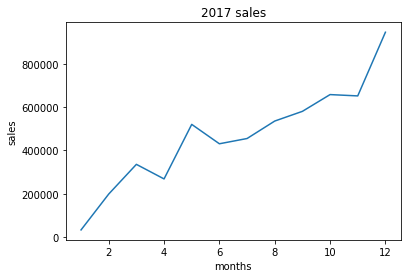

In [319]:
yr_2017=merge3[merge3['year']==2017]
plot_yr2017=pd.DataFrame(yr_2017.groupby(by='month')['price'].sum())
sns.lineplot(x='month',y='price',data=plot_yr2017)
plt.xlabel('months')
plt.ylabel('sales')
plt.title('2017 sales');

BEST SELLING CATEGORY

In [154]:
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,2017.0,10.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,2018.0,8.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,2018.0,8.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,2017.0,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,2018.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP,2018.0,2.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,2017.0,9.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0


In [255]:
cat_df=pd.DataFrame(merge3.groupby(by='product_category_name')['order_id'].count())
cat_df[cat_df['order_id']==cat_df['order_id'].max()]

,order_id
product_category_name,
cama_mesa_banho,11115


In [332]:
cat_df

,order_id
product_category_name,
agro_industria_e_comercio,212
alimentos,510
alimentos_bebidas,278
artes,209
artes_e_artesanato,24
...,...
sinalizacao_e_seguranca,199
tablets_impressao_imagem,83
telefonia,4545


In [267]:
cat_df1=pd.DataFrame(merge3.groupby(by='product_category_name')['price'].sum())
cat_df1[cat_df1['price']==cat_df1['price'].max()]

,price
product_category_name,
beleza_saude,1258681.34


In [268]:
cat_df1=pd.DataFrame(merge3.groupby(by='product_category_name')['price'].sum())
cat_df1[cat_df1['price']==cat_df1['price'].min()]

,price
product_category_name,
seguros_e_servicos,283.29


IN THE CATEGORY BEST SELLER IS CAMA_MESA_BANHO

In [158]:
cat_df[cat_df['order_id']==cat_df['order_id'].min()]

,order_id
product_category_name,
seguros_e_servicos,2


IN THE CATEGORY LEAST SELLER IS SERGUROS_E_SERVICOS

REPITITIVE CUSTOMERS-(customer_unique-id)

In [163]:
rep_cust=pd.DataFrame(merge3.groupby(by='customer_unique_id')['order_id'].count())
rep_cust[rep_cust['order_id']>1]

,order_id
customer_unique_id,
00053a61a98854899e70ed204dd4bafe,2
000de6019bb59f34c099a907c151d855,2
000fbf0473c10fc1ab6f8d2d286ce20c,4
001147e649a7b1afd577e873841632dd,2
0015752e079902b12cd00b9b7596276b,2
...,...
ffe96201d466b0e0dc8139850be29d5d,2
fff22793223fe80c97a8fd02ac5c6295,3
fff5eb4918b2bf4b2da476788d42051c,6


In [175]:
rep_customers=rep_cust[rep_cust['order_id']>1].count()

In [259]:
array=merge3['customer_unique_id'].unique()
total_customers=len(array.tolist())
total_customers

95420

In [177]:
rep_customers/total_customers*100

order_id    12.438692
dtype: float64

12.5 % OF THE CUSTOMERS ARE REPEATING CUSTOMERS

In [283]:
sla_breached_data=merge3[(merge3['delay_flag']==0) & (merge3['order_status']=='delivered')]
sla_breached_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,21.327963,9.394792,...,525.0,21.0,16.0,13.0,d699688533772c15a061e8ce81cb56df,4001.0,sao paulo,SP,2017.0,10.0
26,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,28.928484,19.009109,...,500.0,16.0,12.0,22.0,a25d5f94840d3c6a1a49f271ed83f4ec,21715.0,rio de janeiro,RJ,2018.0,3.0
37,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,30.374757,30.333495,...,850.0,90.0,20.0,20.0,92fd8aa5948e20c43a014c44c025c5e1,77480.0,alvorada,TO,2018.0,3.0
43,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33.896933,26.105694,...,14300.0,38.0,34.0,34.0,3e4fd73f1e86b135b9b121d6abbe9597,19400.0,presidente venceslau,SP,2017.0,12.0
60,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,24.943414,23.381771,...,150.0,19.0,4.0,11.0,ddf60e20e6e262e2136801ce5cd628b0,49030.0,aracaju,SE,2018.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112603,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,18.053148,13.050764,...,12500.0,43.0,33.0,33.0,f690f0caffab80b6f849f08ba1692925,9330.0,maua,SP,2018.0,8.0
112604,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,22.924213,19.091007,...,750.0,18.0,19.0,23.0,4b855cb19adce3763ce1af3acc2aae0b,3122.0,sao paulo,SP,2018.0,4.0
112630,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,39.842222,18.129039,...,150.0,16.0,7.0,11.0,a3983b8b6b679c9f645e6ef9517ac98d,14802.0,araraquara,SP,2017.0,11.0
112632,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,20.209178,18.175486,...,9700.0,27.0,15.0,92.0,397cd1affbb66fa8f76e8ac24685440a,13272.0,valinhos,SP,2018.0,4.0


In [284]:
sla_customer=sla_breached_data['customer_unique_id'].unique()
list1=sla_customer.tolist()

In [277]:
column = ['customer_unique_id']
dfq=pd.DataFrame(list1,columns=column)
dfq

,customer_unique_id
0,d699688533772c15a061e8ce81cb56df
1,a25d5f94840d3c6a1a49f271ed83f4ec
2,92fd8aa5948e20c43a014c44c025c5e1
3,3e4fd73f1e86b135b9b121d6abbe9597
4,ddf60e20e6e262e2136801ce5cd628b0
...,...
7774,f690f0caffab80b6f849f08ba1692925
7775,4b855cb19adce3763ce1af3acc2aae0b
7776,a3983b8b6b679c9f645e6ef9517ac98d
7777,397cd1affbb66fa8f76e8ac24685440a


In [212]:
rep_cust
        

,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [219]:
breached_cus_order_freq=pd.merge(dfq,rep_cust,how='left',on='customer_unique_id')
breached_cus_order_freq

,customer_unique_id,order_id
0,36edbb3fb164b1f16485364b6fb04c73,1
1,d699688533772c15a061e8ce81cb56df,1
2,a25d5f94840d3c6a1a49f271ed83f4ec,1
3,92fd8aa5948e20c43a014c44c025c5e1,1
4,3e4fd73f1e86b135b9b121d6abbe9597,1
...,...,...
9935,f690f0caffab80b6f849f08ba1692925,2
9936,4b855cb19adce3763ce1af3acc2aae0b,1
9937,a3983b8b6b679c9f645e6ef9517ac98d,1
9938,397cd1affbb66fa8f76e8ac24685440a,1


In [220]:
breached_cus_order_freq[breached_cus_order_freq['order_id']>1]

,customer_unique_id,order_id
5,08fb46d35bb3ab4037202c23592d1259,2
6,ddf60e20e6e262e2136801ce5cd628b0,2
7,51838d41add414a0b1b989b7d251d9ee,3
14,b854c56e1163bced9c3ebf1e4a6576f3,4
48,3abdf4f27efce96f8573a88343a4084e,2
...,...,...
9904,d06f106a141c540ca3b3cc0a3a8bba39,2
9913,48c3fff2293e3bcf50dfacf6a06d487b,2
9920,0f75924cbbe60142068f4029d744b724,2
9924,439624e26bc73309799fd718773bdb8a,2


In [285]:
print(1228/7779*100,"is the percentage of repitition among sla breached customers")

15.786090757166733 is the percentage of repitition among sla breached customers


Total order value (state_wise) 

In [249]:
sum_df=pd.DataFrame(merge3.groupby('customer_state')['price'].sum())
sum_df[sum_df['price']==sum_df['price'].max()]

,price
customer_state,
SP,5202955.05


The highest sales is done by State SP

In [250]:
sum_df[sum_df['price']==sum_df['price'].min()]

,price
customer_state,
RR,7829.43


The lowest sales is done by State RR

In [261]:
sum_df2=pd.DataFrame(merge3.groupby('customer_city')['price'].sum())
sum_df2[sum_df2['price']==sum_df2['price'].max()]

,price
customer_city,
sao paulo,1914924.54


In [262]:
sum_df2=pd.DataFrame(merge3.groupby('customer_city')['price'].sum())
sum_df2[sum_df2['price']==sum_df2['price'].min()]

,price
customer_city,
polo petroquimico de triunfo,5.6


In [264]:
sum_df3=pd.DataFrame(merge3.groupby('customer_zip_code_prefix')['price'].sum())
sum_df3[sum_df3['price']==sum_df3['price'].max()]

,price
customer_zip_code_prefix,
22790.0,22154.89


In [265]:
sum_df3=pd.DataFrame(merge3.groupby('customer_zip_code_prefix')['price'].sum())
sum_df3[sum_df3['price']==sum_df3['price'].min()]

,price
customer_zip_code_prefix,
25907.0,3.54


Freight value on category and states

In [245]:
df_state=pd.DataFrame(merge3.groupby('customer_state')['freight_value'].mean())
df_state[df_state['freight_value']==df_state['freight_value'].max()]

,freight_value
customer_state,
RR,42.984423


STATE RR HAS THE HIGHEST FREIGHT PRIZE

In [246]:
df_state[df_state['freight_value']==df_state['freight_value'].min()]

,freight_value
customer_state,
SP,15.147275


STATE SP HAS THE LOWEST FREIGHT PRIZE

In [252]:
df_fr=pd.DataFrame(merge3.groupby('product_category_name')['freight_value'].mean())
df_fr[df_fr['freight_value']==df_fr['freight_value'].max()]

,freight_value
product_category_name,
pcs,48.45468


In [253]:
df_fr[df_fr['freight_value']==df_fr['freight_value'].min()]

,freight_value
product_category_name,
fashion_roupa_infanto_juvenil,11.93875


SALES ON PRODUCT LEVEL

In [290]:
pro_df=pd.DataFrame(merge3.groupby(by='product_id')['price'].sum())
pro_df[pro_df['price']==pro_df['price'].max()]

,price
product_id,
bb50f2e236e5eea0100680137654686c,63885.0


In [291]:
pro_df[pro_df['price']==pro_df['price'].min()]

,price
product_id,
46fce52cef5caa7cc225a5531c946c8b,2.2


In [299]:
pro_df1=pd.DataFrame(merge3.groupby(by='product_id')['order_id'].count())
pro_df1[pro_df1['order_id']==pro_df1['order_id'].max()]

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527


In [300]:
pro_df1[pro_df1['order_id']==pro_df1['order_id'].min()]

,order_id
product_id,
00066f42aeeb9f3007548bb9d3f33c38,1
00088930e925c41fd95ebfe695fd2655,1
0009406fd7479715e4bef61dd91f2462,1
000d9be29b5207b54e86aa1b1ac54872,1
0011c512eb256aa0dbbb544d8dffcf6e,1
...,...
fff28f91211774864a1000f918ed00cc,1
fff515ea94dbf35d54d256b3e39f0fea,1
fff81cc3158d2725c0655ab9ba0f712c,1


DELIVERY TIME STATE WISE

In [292]:
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,2017.0,10.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,2018.0,8.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,2018.0,8.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,2017.0,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,2018.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP,2018.0,2.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,2017.0,9.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0


In [297]:
del_time=pd.DataFrame(merge3.groupby(by='customer_state')['Delivery Time'].mean())
del_time[del_time['Delivery Time']==del_time['Delivery Time'].max()]

,Delivery Time
customer_state,
RR,28.231011


In [298]:
del_time[del_time['Delivery Time']==del_time['Delivery Time'].min()]

,Delivery Time
customer_state,
SP,8.723795


AVERAGE ORDER VALUE

In [338]:
merge3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery Time,SLA,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,2017.0,10.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,...,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,2018.0,8.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,...,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,2018.0,8.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,...,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,2017.0,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,...,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,2018.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,...,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP,2018.0,2.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,...,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,2017.0,9.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,2018.0,1.0


In [344]:
order_val=pd.DataFrame(merge3.groupby(by='customer_state')['price'].median())
order_val[order_val['price']==order_val['price'].max()]

,price
customer_state,
PI,99.99


In [345]:
order_val[order_val['price']==order_val['price'].min()]

,price
customer_state,
SP,69.88


In [346]:
order_val1=pd.DataFrame(merge3.groupby(by='customer_state')['price'].min())
order_val1[order_val1['price']==order_val1['price'].max()]

,price
customer_state,
AP,13.65
RR,13.65
SE,13.65


In [347]:
order_val1[order_val1['price']==order_val1['price'].min()]

,price
customer_state,
RJ,0.85
SP,0.85
